# HR Analytics Employee Attrition & Performance (EDA)

Uncover the factors that lead to employee attrition and also explore important questions such as 
* show me a breakdown of features by job role and attrition
* compare average monthly income by education and attrition
* Is no increase in Pay or No stock option or No promotion the reasons for Employee Attrition?
* Is there a gender bias in the pay?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

In [2]:
emp_df = pd.read_csv('employee_data_categorical_data.csv')

In [3]:
emp_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyRate,MonthlyIncome
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,19479.0,5993.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,24907.0,5130.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,2396.0,2090.0


In [4]:
emp_df = emp_df.dropna()  # 16 rows have NULL Gender is dropped

In [5]:
emp_df.shape

(1454, 35)

# Checking all the features for Attrition & Non Attrition Population

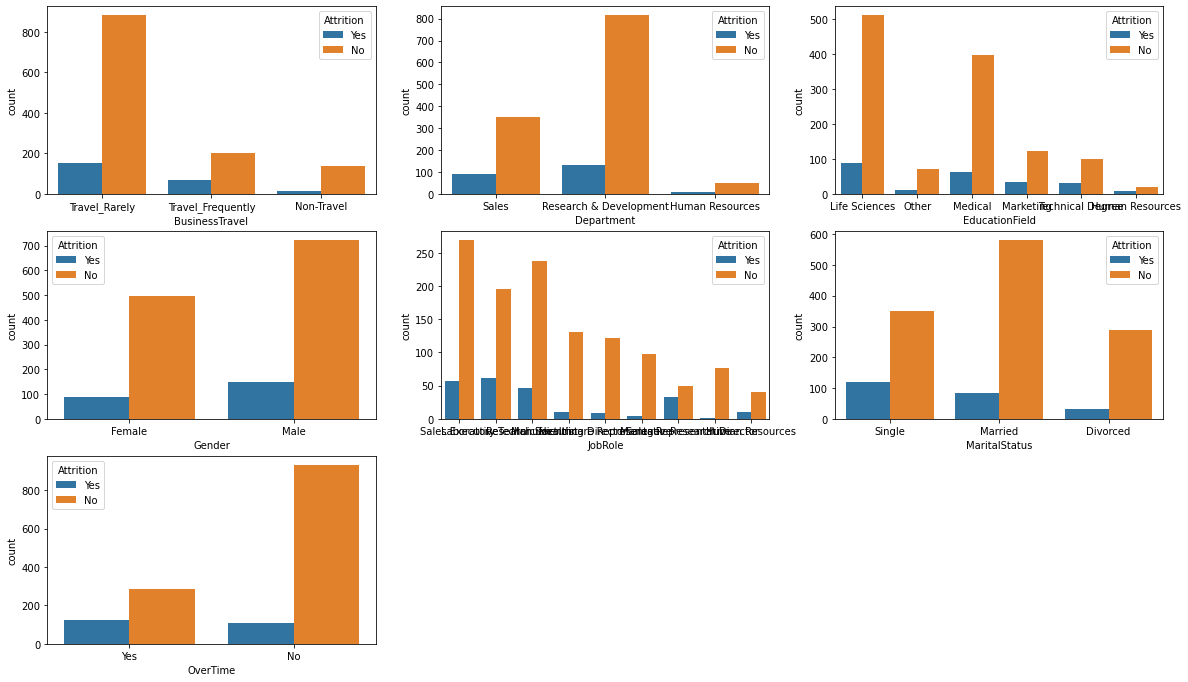

In [6]:
cnt = 1
plt.figure(figsize=(20,20))
for col in emp_df.columns:
    if emp_df[col].dtypes == 'O' and col not in ['Over18','Attrition']:
        plt.subplot(5,3,cnt)
        sns.countplot(x= col, hue='Attrition', data = emp_df)
        cnt+= 1
        

# Checking all the features for Attrition Population

In [7]:
Attrition_df = emp_df[emp_df['Attrition']=='Yes']
Non_Attrition_df = emp_df[emp_df['Attrition']=='No']

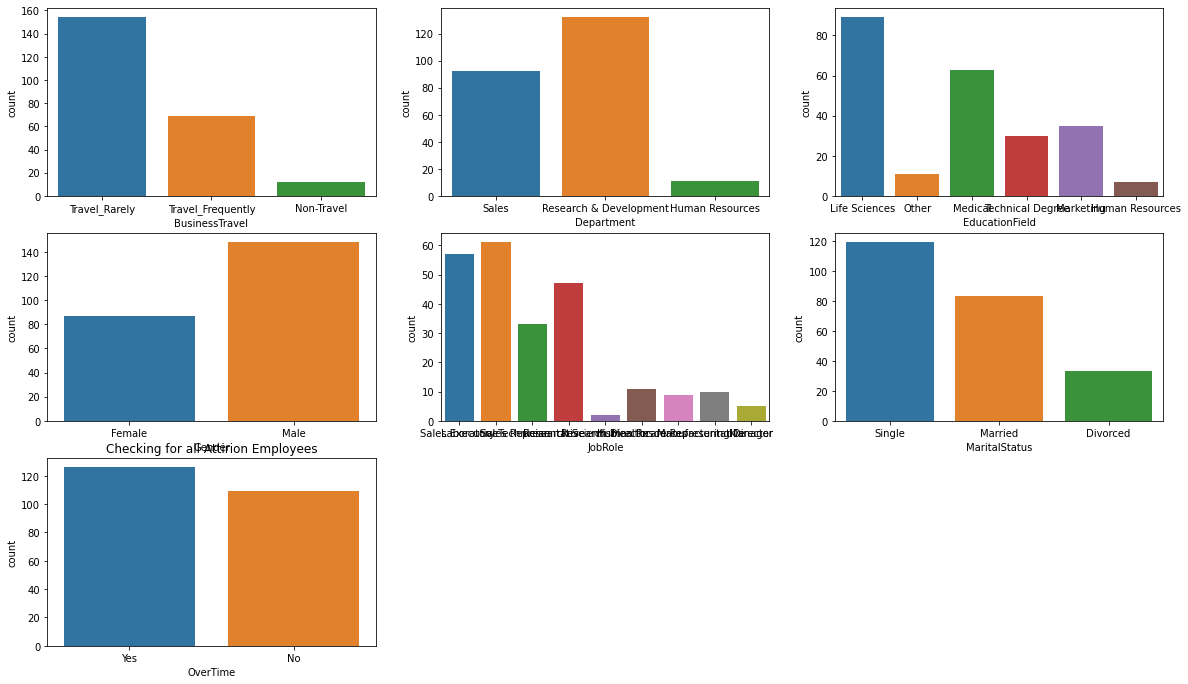

In [8]:
cnt = 1
plt.figure(figsize=(20,20))
for col in Attrition_df.columns:
    if Attrition_df[col].dtypes == 'O' and col not in ['Over18','Attrition']:
        plt.subplot(5,3,cnt)
        sns.countplot(x= col, data = Attrition_df , )
        cnt+= 1
_=plt.title('Checking for all Attirion Employees')

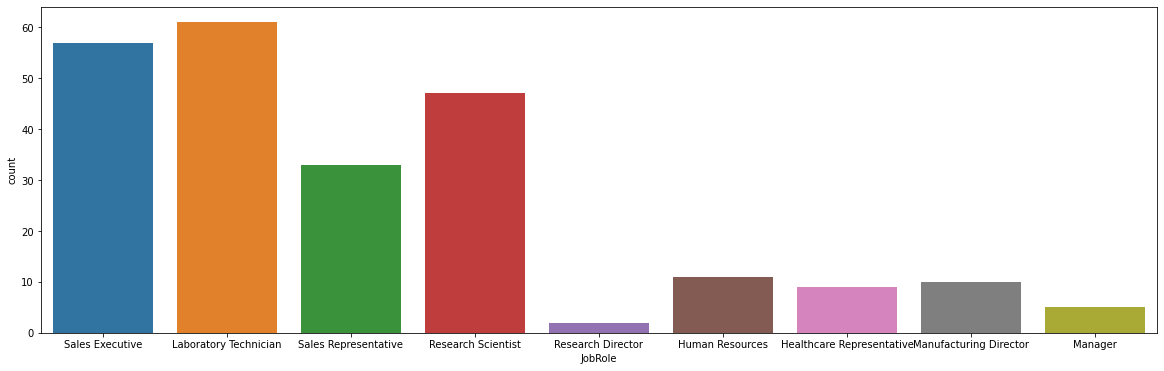

In [9]:
plt.figure(figsize=(20,6))
sns.countplot(x= 'JobRole', data = Attrition_df  )


Insights:
 * Shows Attrition ratio is higher in "life Sciences' Education field when compare to Others
 * Shows the segment of employee are having Attrition Ratio (like Single, Male, Lab tech are more likely to switch jobs etc)

# Analysis 1 : Compare average monthly income by Job role and attrition

,JobRole,Attrition,MonthlyIncome
0,Healthcare Representative,No,7453.557377
1,Healthcare Representative,Yes,8548.222222
2,Human Resources,No,4391.750000
3,Human Resources,Yes,3820.454545
4,Laboratory Technician,No,3342.127551
5,Laboratory Technician,Yes,2906.606557
6,Manager,No,16884.403097
7,Manager,Yes,16797.400000
8,Manufacturing Director,No,7323.645625
9,Manufacturing Director,Yes,7365.500000


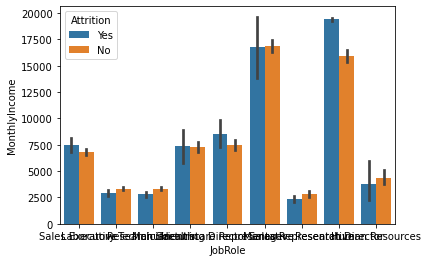

In [10]:
sns.barplot(x= 'JobRole',y='MonthlyIncome',hue='Attrition', data =emp_df )
emp_df.groupby(['JobRole','Attrition'])['MonthlyIncome'].mean().reset_index()

__There is NO considerable difference between the pay of Attrition and Non-Attrition employees by JobRole__

# Analysis 2 : Compare average monthly income by education and attrition

,Education,Attrition,MonthlyIncome
0,1,No,5860.390741
1,1,Yes,4382.466667
2,2,No,6586.058824
3,2,Yes,4322.511628
4,3,No,6918.493871
5,3,Yes,4754.437710
6,4,No,7040.979280
7,4,Yes,5335.155172
8,5,No,8699.642857
9,5,Yes,5850.200000


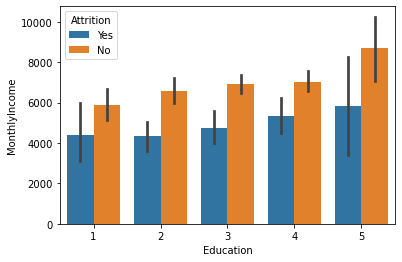

In [11]:
sns.barplot(x= 'Education',y='MonthlyIncome',hue='Attrition', data =emp_df )
emp_df.groupby(['Education','Attrition'])['MonthlyIncome'].mean().reset_index()

__Attrition Employees were paid approximately 30% lesser than Non Attrition employees for same level of Education__

# Analysis 3 : Is no increase in Pay or No stock option or No promotionm and PerformanceRating the reasons for Employee Attrition?

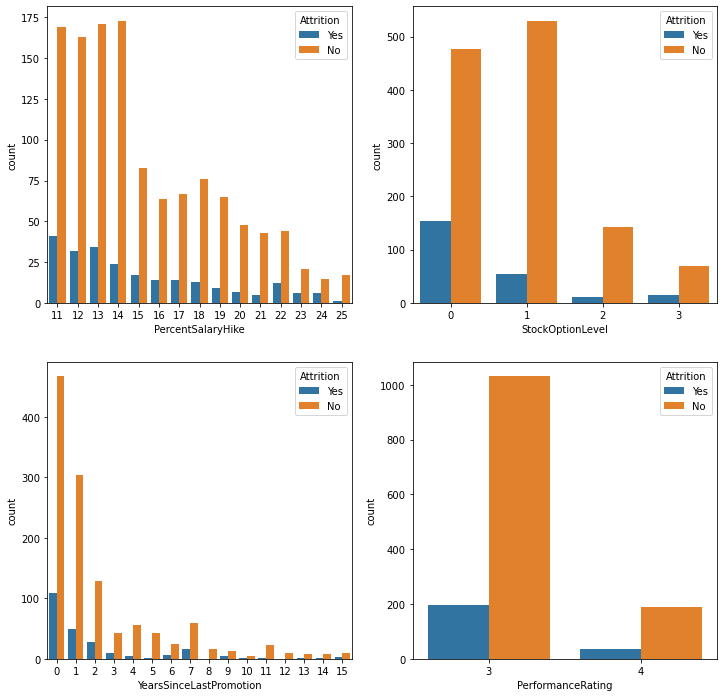

In [12]:
cnt = 1
plt.figure(figsize=(12,12))
for col in ['PercentSalaryHike','StockOptionLevel','YearsSinceLastPromotion' ,'PerformanceRating']: 
    plt.subplot(2,2,cnt)
    sns.countplot(x= col,hue='Attrition', data =emp_df )
    cnt+= 1

__People having less SalaryHike and No stock options are more likely to have more Attrition rate.
 People are leaving company after their Promotion__

# Analysis 4 : Is there a gender bias in the pay?

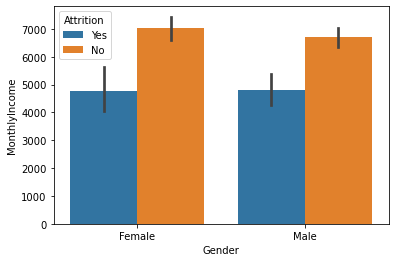

In [13]:
sns.barplot(x= 'Gender',y='MonthlyIncome',hue='Attrition', data =emp_df )

In [14]:
emp_df.groupby(['Gender'])['MonthlyIncome'].mean().reset_index()

,Gender,MonthlyIncome
0,Female,6695.794040
1,Male,6372.348344


In [15]:
female_pop = emp_df[emp_df['Gender']=='Female']['MonthlyIncome']
male_pop = emp_df[emp_df['Gender']=='Male']['MonthlyIncome']

In [16]:
female_pop.iloc[:5],male_pop.iloc[:5]

(0     5993.0
 3     2909.0
 6     2670.0
 11    4193.0
 15    9980.0
 Name: MonthlyIncome, dtype: float64,
 2    2090.0
 4    3468.0
 5    3068.0
 7    2693.0
 8    9526.0
 Name: MonthlyIncome, dtype: float64)

In [17]:
# Checking whether data is normally distributed or not
# Null Hypo: Data normally distributed
# Atlernate Hypo : Data not normally distributed

In [18]:
stats.normaltest(female_pop)
stats.normaltest(male_pop)

NormaltestResult(statistic=202.75277276248647, pvalue=9.3927940370294e-45)

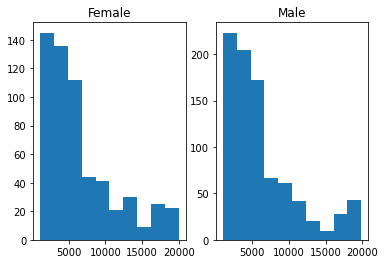

In [19]:
plt.subplot(1,2,1)
_=plt.hist(female_pop)
_=plt.title('Female')
plt.subplot(1,2,2)
_=plt.hist(male_pop)
_=plt.title('Male')

Null Hypothesis is data is normally distributed, because of p-value , we failed to reject NULL Hypothesis
__Data is normally distributed__

# Doing 2 Sample T-Test

NULL Hypothesis : Men and Women are paid equally in the company
Alternate Hypothesis : Gender bias in pay in the company

In [21]:
f_sample =[]
m_sample =[]

def get_sample(list1,n):
    return np.random.choice(list1,n)

for i in range(1000):
    f_sample.append(np.mean(get_sample(female_pop,100)))
    m_sample.append(np.mean(get_sample(male_pop,100)))

In [22]:
stats.normaltest(f_sample), stats.normaltest(m_sample)

(NormaltestResult(statistic=1.3392219409173929, pvalue=0.511907686266869),
 NormaltestResult(statistic=7.716237939952708, pvalue=0.021107666358240403))

In [ ]:
# Sample male and female monthly income data is Normally distributed

In [23]:
test_stats,p_value = stats.ttest_ind(f_sample,m_sample)
test_stats,p_value

(16.81452281132304, 1.918018459607972e-59)

Since p-value is less then alpha, we can conclude __There is no Gender bias in the pay in the company__

__Insights__

* Sales Rep, HR, Lab Tech in job role have more attition ratio than other departments
* People at job level 1 has more attriton ratio than other job level
* Attrition ratio is more for no stock options
* People at less years in company (< 10 yrs) have more attition ratio than more experienced persons (yearsAtcompany)

# Relationship between features

In [25]:
emp_df_numerical = pd.read_csv('employee_data_cleaned.csv')

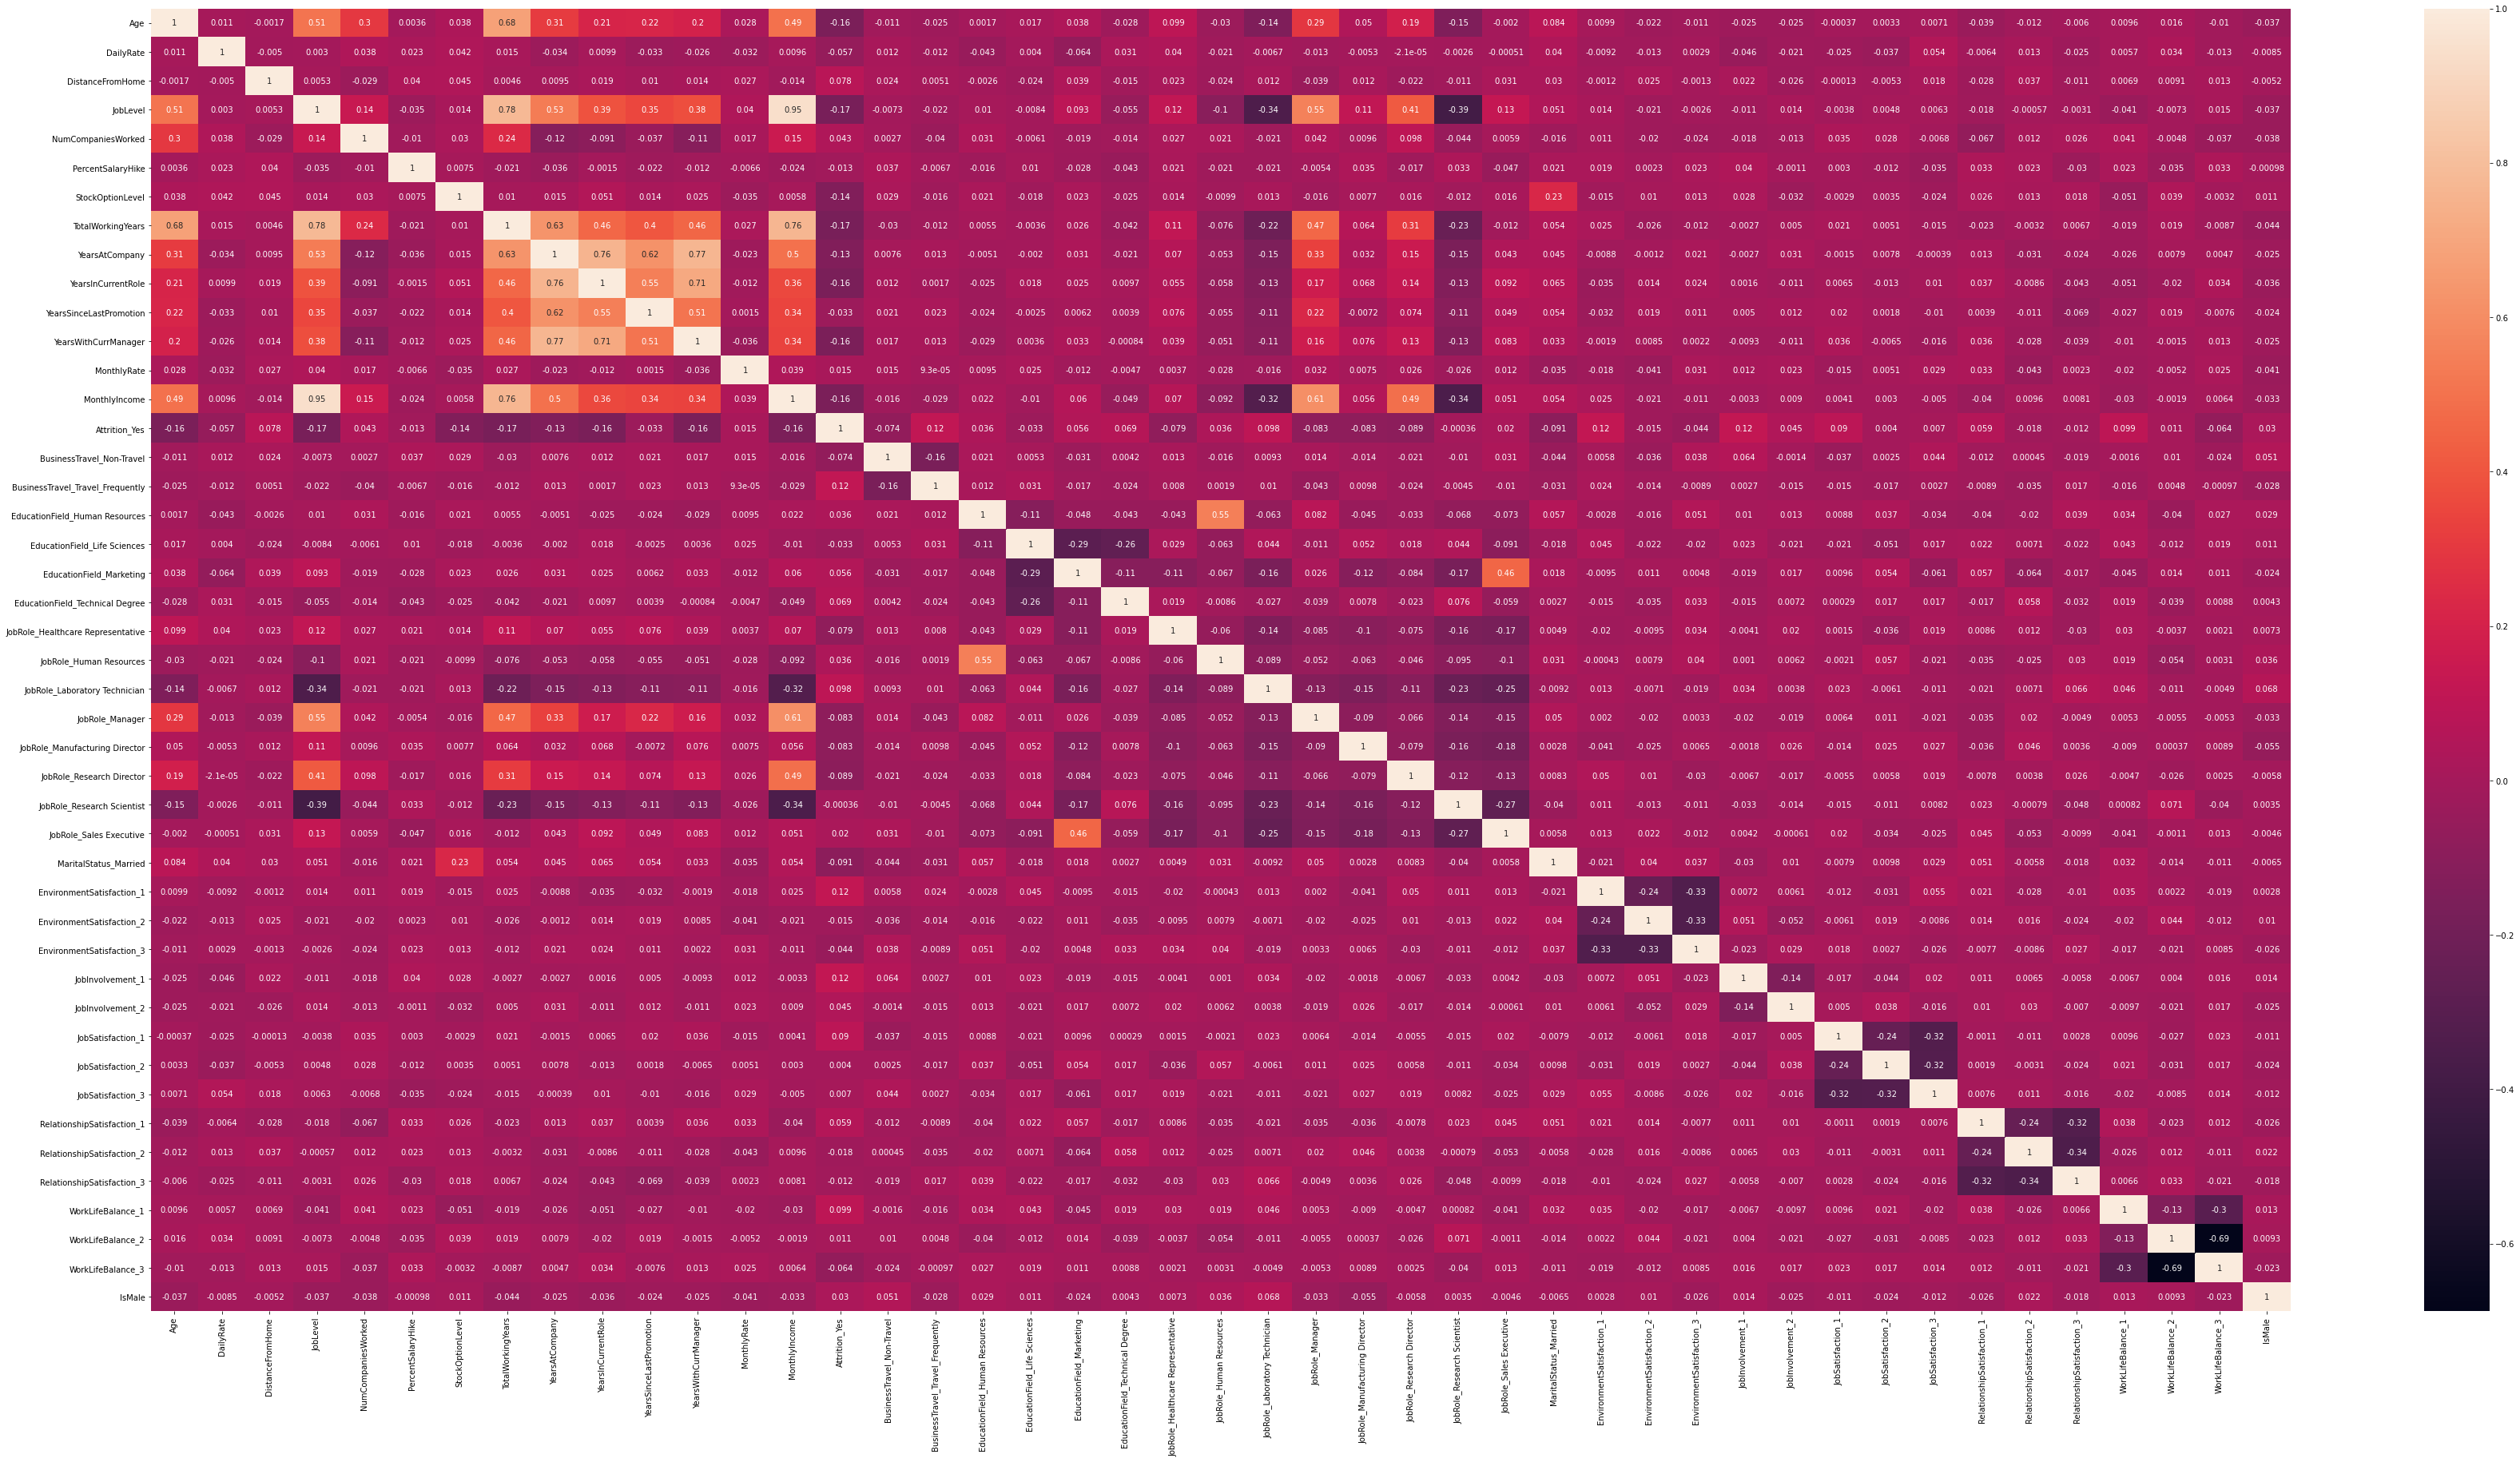

In [26]:
plt.figure(figsize=(60,30))
sns.heatmap(emp_df_numerical[['Age', 'DailyRate', 'DistanceFromHome', 'JobLevel',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MonthlyRate', 'MonthlyIncome', 'Attrition_Yes',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive',
       'MaritalStatus_Married', 'EnvironmentSatisfaction_1',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'JobInvolvement_1', 'JobInvolvement_2',
       'JobSatisfaction_1', 'JobSatisfaction_2', 'JobSatisfaction_3',
       'RelationshipSatisfaction_1',
       'RelationshipSatisfaction_2', 'RelationshipSatisfaction_3',
       'WorkLifeBalance_1', 'WorkLifeBalance_2', 'WorkLifeBalance_3',
       'IsMale']].corr(),annot=True)

# Analysis 5 : Employees with No Stock Options has more Attrition rate than employees with stock options

* Null Hypothesis : Attrition rate is not related to employees having stock or not
* Alternate Hypothesis : Attrition rate is higher for employess with No Stock options

In [39]:
emp_df_stock = emp_df[emp_df['StockOptionLevel']!=0]
emp_df_no_stock = emp_df[emp_df['StockOptionLevel']==0]

In [40]:
emp_df_stock['Attrition'].value_counts() # 10% of Attrition ratio with employees having stock

No     743
Yes     82
Name: Attrition, dtype: int64

In [41]:
emp_df_no_stock['Attrition'].value_counts() # 24% of Attrition ratio with employees having stock

No     476
Yes    153
Name: Attrition, dtype: int64

In [42]:
emp_with_stock = np.array([True] * 82 + [False] * 743)
emp_with_no_stock = np.array([True] * 153 + [False] * 476)

In [44]:
def find_frac(emp_with_stock,emp_with_no_stock):
    frac = np.sum(emp_with_stock)/len(emp_with_stock)
    return frac

In [48]:
def permutation_sample(data1,data2):
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    sample_data1 = permuted_data[:len(data1)]
    sample_data2 = permuted_data[len(data1):]
    return sample_data1,sample_data2

In [47]:
def draw_perm_samples(data1,data2,func, size=1):
    perm_replicates = np.empty(size)
    print ('size is ',size)
    for i in range(size):
        sample_data1,sample_data2 = permutation_sample(data1,data2)
        perm_replicates[i] = find_frac(sample_data1,sample_data2)
    return perm_replicates

In [49]:
# Permutation Samples
perm_replicates = draw_perm_samples(emp_with_stock,emp_with_no_stock,find_frac,10000)


size is  10000


In [50]:
p_value = np.sum(perm_replicates <= 82/(82+743)) / len(perm_replicates)
p_value

0.0

* Since p-value is less than 0.05, we reject the NULL Hypothesis and prove the fact that __"Attrition rate is higher for employess with No Stock options"__

# FInding the Distribution of all Continouous Numerical columns

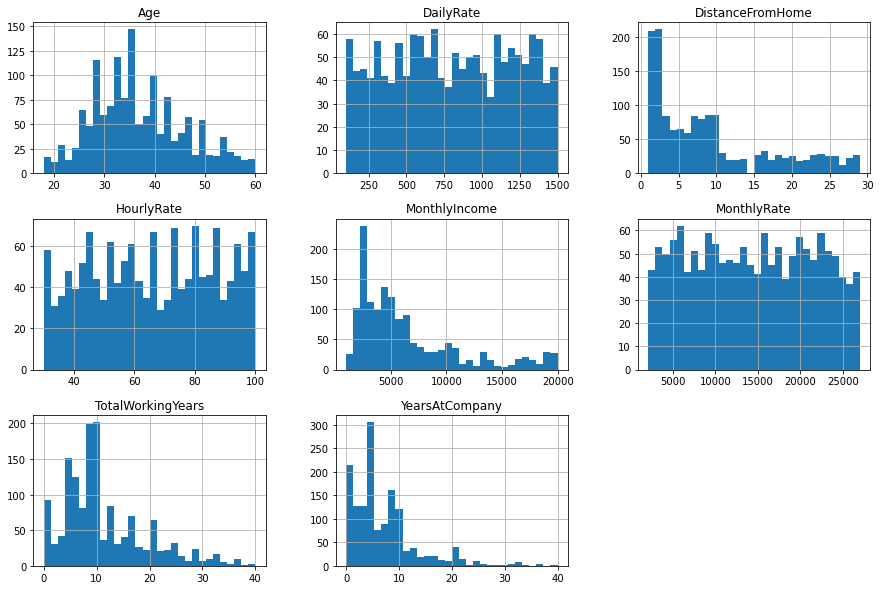

In [57]:
numerical_conti_cols = [col for col in emp_df_numerical.columns if emp_df_numerical[col].nunique() >= 25]
_=emp_df_numerical[numerical_conti_cols].hist(bins=30, figsize=(15, 10))

<Figure size 1440x1440 with 0 Axes>

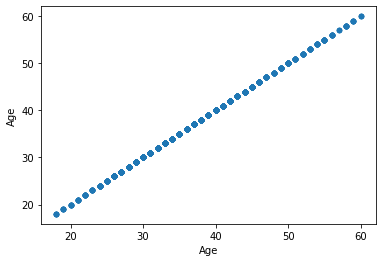

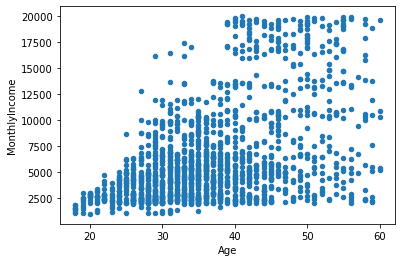

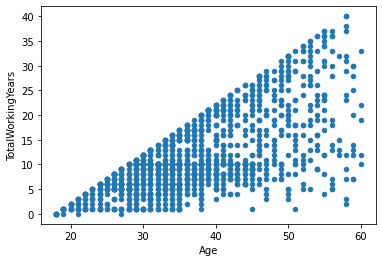

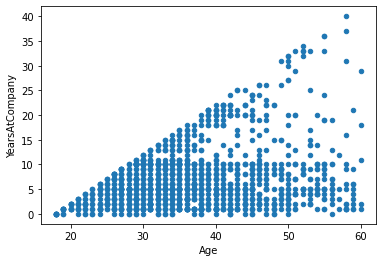

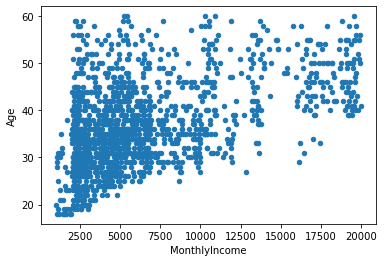

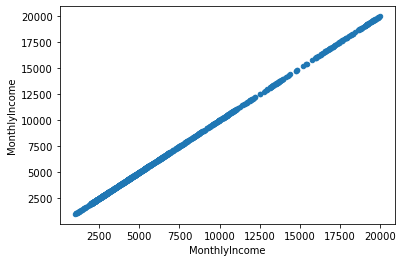

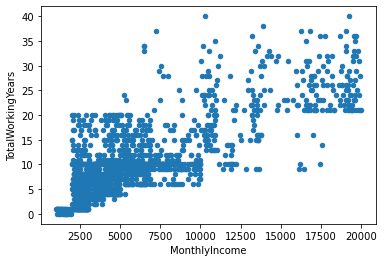

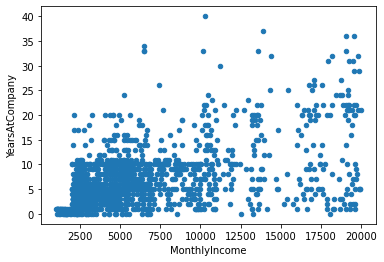

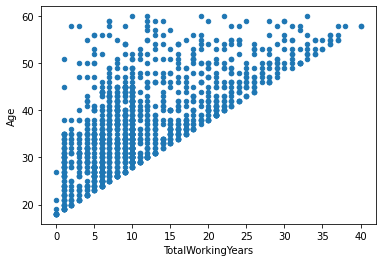

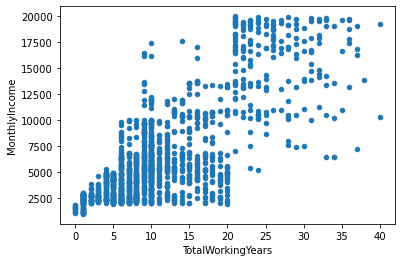

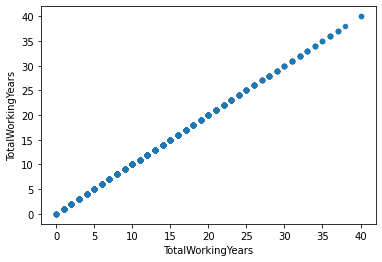

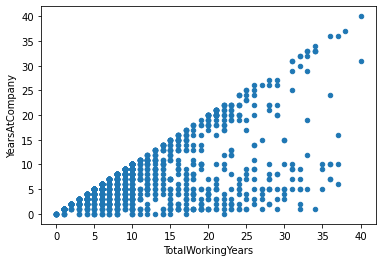

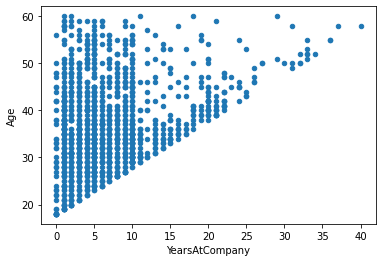

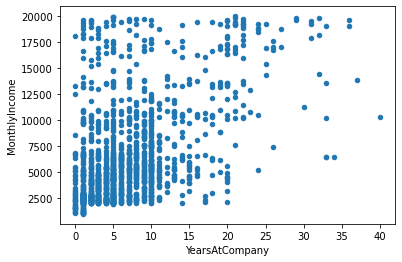

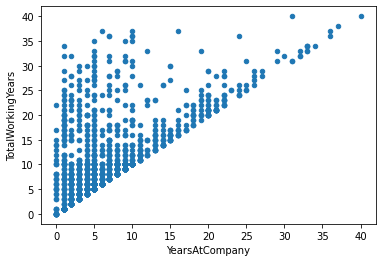

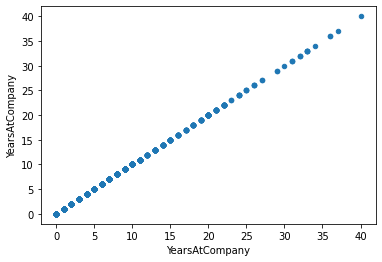

In [70]:
plt.figure(figsize=(20,20))
cnt = 1
for col1 in ['Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany']:
    for col2 in ['Age','MonthlyIncome','TotalWorkingYears','YearsAtCompany']:
        _=emp_df_numerical[numerical_conti_cols].plot(kind="scatter", x=col1,y= col2)
        cnt+= 1

# Final Insights

* There is NO considerable difference between the pay of Attrition and Non-Attrition employees by JobRole

* Attrition Employees were paid approximately 30% lesser than Non Attrition employees for same level of Education

* People having less SalaryHike and No stock options are more likely to have more Attrition rate. People are leaving company after their Promotion

* There is no Gender bias in the pay in the company

* Attrition rate is higher for employess with No Stock options

* People at entry level( job level 1 )has more attriton ratio than higher  job level

* People with less years od experience more likely to switch the jobs
